<a href="https://colab.research.google.com/github/Muhammed799900/Knee-osteoporosis-disease/blob/main/Knee%20Osteoporosis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import tensorflow as tf
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt
import numpy as np
import os

In [ ]:
IMAGE_SIZE = 224
BATCH_SIZE = 32
EPOCHS = 15
CHANNELS=3

In [ ]:
# Update the path to your dataset directory.
# If it's in your Google Drive, it might look like '/content/drive/MyDrive/dataset'
dataset_path = "/content/drive/MyDrive/Knee training,validation and testing"

# Manually count the images in each class directory
class_image_counts = {class_name: len(os.listdir(os.path.join(dataset_path, class_name)))
                      for class_name in os.listdir(dataset_path)
                      if os.path.isdir(os.path.join(dataset_path, class_name))}

print("Image counts per class:", class_image_counts)

# Assign the result of the function call to the variable 'dataset'
dataset = tf.keras.preprocessing.image_dataset_from_directory(
    dataset_path,  # Use the correct path to your dataset
    shuffle=True,
    image_size=(IMAGE_SIZE, IMAGE_SIZE),
    batch_size=BATCH_SIZE
)
num_batches = len(dataset)
print(f"Number of batches: {num_batches}")
total_images = 0
for batch in dataset:
    total_images += batch[0].shape[0]  # batch[0] are the images

print(f"Total number of images: {total_images}")

class_name = dataset.class_names # Now you can use 'dataset'
print(class_name)

# Number of images (approximation)
num_images = total_images
print(f"Approximate total number of images: {num_images}")

Image counts per class: {'training': 2, 'testing': 2, 'validation': 2}
Found 372 files belonging to 3 classes.
Number of batches: 12
Total number of images: 372
['testing', 'training', 'validation']
Approximate total number of images: 372


In [ ]:
for image_batch, labels_batch in dataset.take(1):
    pass

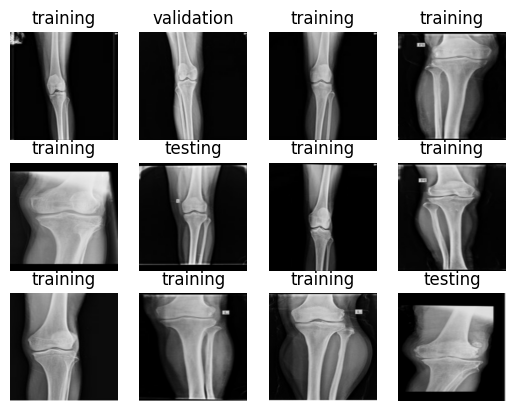

In [ ]:
for image_batch, labels_batch in dataset.take(1):
  for i in range(min(image_batch.shape[0], 12)):  # Limit to 12 or fewer images
    ax = plt.subplot(3, 4, i + 1)
    plt.imshow(image_batch[i].numpy().astype("uint8"))
    plt.title(class_name[labels_batch[i]])
    plt.axis("off")
plt.show()

In [ ]:
img_height, img_width = (224, 224)
batch_size = 32

train_data_dir = r"/content/drive/MyDrive/Knee training,validation and testing/training"
valid_data_dir = r"/content/drive/MyDrive/Knee training,validation and testing/validation"
test_data_dir = r"/content/drive/MyDrive/Knee training,validation and testing/testing"

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import tensorflow as tf  # If tf is not already imported
# If you plan to use the 'preprocess_input' function
# Ensure it's imported from the correct module
from tensorflow.keras.applications.vgg16 import preprocess_input

# ... your existing code ...

train_datagen = ImageDataGenerator(preprocessing_function=preprocess_input,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True,
                                   validation_split=0.4)

# Define train_generator
train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical',
    subset='training'  # Use 'training' for the training set
)

valid_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation'
)

test_generator = train_datagen.flow_from_directory(
    test_data_dir,
    target_size=(img_height, img_width),
    batch_size=1,
    class_mode='categorical'
    # Remove subset='validation' as it's not needed for test data
)
# ...rest of your code...

Found 180 images belonging to 2 classes.
Found 118 images belonging to 2 classes.
Found 37 images belonging to 2 classes.


In [ ]:
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential


resize_and_rescale = tf.keras.Sequential([
     layers.Resizing(IMAGE_SIZE, IMAGE_SIZE),
     layers.Rescaling(1.0/255)
])

In [ ]:
data_augmentation = tf.keras.Sequential([
     layers.RandomFlip("horizontal_and_vertical"),
     layers.RandomRotation(0.2),
])

In [ ]:
x, y = next(test_generator) # Use next(test_generator) to get the next batch
x.shape

(1, 224, 224, 3)

In [ ]:
train_generator.num_classes

2

In [ ]:
#vgg model building
import tensorflow as tf
from tensorflow import keras
from keras.applications import ResNet50
from keras.layers import Dense, Dropout, GlobalAveragePooling2D
from keras.models import Model

In [ ]:
base_model =  ResNet50(weights = 'imagenet', include_top = False, input_shape = (IMAGE_SIZE, IMAGE_SIZE, 3))

In [ ]:
#freezing the layers
for layer in ResNet.layers:
  layer.trainable = False

In [ ]:
input_shape = (None,IMAGE_SIZE, IMAGE_SIZE,3)
model = keras.Sequential([
    keras.layers.GlobalAveragePooling2D(),
    keras.layers.Dense(1024, activation = 'relu'),
    keras.layers.Dense(512, activation = 'relu'),
    keras.layers.Dense(train_generator.num_classes, activation = 'softmax')
])
model.build(input_shape = input_shape)

In [ ]:
model.summary()

Model: "sequential_11"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ global_average_pooling2d_8           │ (None, 3)                   │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_12 (Dense)                     │ (None, 1024)                │           4,096 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_13 (Dense)                     │ (None, 512)                 │         524,800 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_14 (Dense)                     │ (None, 2)                   │           1,026 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 529,922 (2.02 MB)

 Trainable params: 529,922 (2.02 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping
callback = EarlyStopping(
    monitor = 'val_loss',
    min_delta = 0.00001,
    patience = 20,
    baseline = None,
    verbose = 1,
    mode = "auto",
    restore_best_weights = False
)

In [ ]:
import tensorflow as tf

# Assuming 'train_data_dir' is a path to your image data directory
train_dataset = tf.keras.utils.image_dataset_from_directory(
    train_data_dir,
    labels='inferred', # Infer labels from subdirectory names
    label_mode='categorical', # Use categorical labels for multi-class classification
    image_size=(224, 224), # Resize images to match ResNet50 input shape
    batch_size=32, # Match your desired batch size
    shuffle=True # Shuffle the data
)

# ... (rest of your code)

history = model.fit(
    train_dataset, # Pass the TensorFlow Dataset object
    validation_data=valid_generator,
    verbose=1,
    epochs=15,
    callbacks=[callback],
)

Found 298 files belonging to 2 classes.
Epoch 1/15
10/10 ━━━━━━━━━━━━━━━━━━━━ 7s 598ms/step - accuracy: 0.5119 - loss: 9.5221 - val_accuracy: 0.5000 - val_loss: 2.8357
Epoch 2/15
10/10 ━━━━━━━━━━━━━━━━━━━━ 5s 508ms/step - accuracy: 0.4594 - loss: 3.3525 - val_accuracy: 0.4831 - val_loss: 2.9933
Epoch 3/15
10/10 ━━━━━━━━━━━━━━━━━━━━ 3s 349ms/step - accuracy: 0.5325 - loss: 0.9027 - val_accuracy: 0.4915 - val_loss: 2.8829
Epoch 4/15
10/10 ━━━━━━━━━━━━━━━━━━━━ 5s 373ms/step - accuracy: 0.4884 - loss: 1.1773 - val_accuracy: 0.5000 - val_loss: 2.9328
Epoch 5/15
10/10 ━━━━━━━━━━━━━━━━━━━━ 4s 478ms/step - accuracy: 0.4901 - loss: 1.3652 - val_accuracy: 0.5169 - val_loss: 2.8810
Epoch 6/15
10/10 ━━━━━━━━━━━━━━━━━━━━ 4s 384ms/step - accuracy: 0.5609 - loss: 0.8394 - val_accuracy: 0.4915 - val_loss: 2.8592
Epoch 7/15
10/10 ━━━━━━━━━━━━━━━━━━━━ 5s 386ms/step - accuracy: 0.4912 - loss: 1.0802 - val_accuracy: 0.5000 - val_loss: 2.7955
Epoch 8/15
10/10 ━━━━━━━━━━━━━━━━━━━━ 7s 706ms/step - accuracy: 

In [ ]:
history = model.fit(
    train_data_dir,
    batch_size=32,
    validation_data = valid_generator,
    verbose=1,
    epochs=15,
    callbacks=[callback],
)

ValueError: Unrecognized data type: x=/content/drive/MyDrive/Knee training,validation and testing/training (of type <class 'str'>)

In [ ]:
scores = model.evaluate(test_data_dir)

ValueError: Unrecognized data type: x=/content/drive/MyDrive/Knee training,validation and testing/testing (of type <class 'str'>)

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

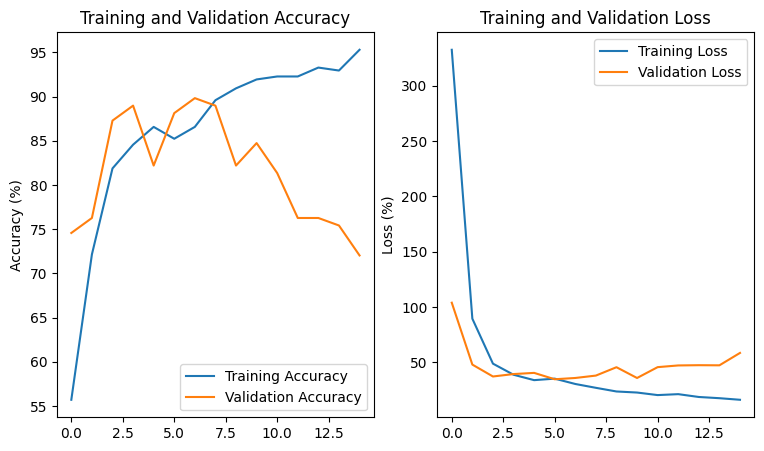

In [ ]:
# ... (previous code)

# Get the actual number of epochs from the history object
EPOCHS = len(history.history['accuracy'])

plt.figure(figsize=(9, 5))

# First Subplot: Accuracy (Scaled to 1-100)
plt.subplot(1, 2, 1)
plt.plot(range(EPOCHS), [x * 100 for x in acc], label='Training Accuracy')  # Scale by 100
plt.plot(range(EPOCHS), [x * 100 for x in val_acc], label='Validation Accuracy')  # Scale by 100
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')
plt.ylabel('Accuracy (%)')  # Add ylabel to indicate percentage

# Second Subplot: Loss (Scaled to 1-100)
plt.subplot(1, 2, 2)
plt.plot(range(EPOCHS), [x * 100 for x in loss], label='Training Loss')  # Scale by 100
plt.plot(range(EPOCHS), [x * 100 for x in val_loss], label='Validation Loss')  # Scale by 100
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.ylabel('Loss (%)')  # Add ylabel to indicate percentage

plt.show()


In [ ]:
def predict(model, img,class_name):
    img_array = tf.keras.preprocessing.image.img_to_array(img)
    img_array = tf.expand_dims(img_array, 0)

    predictions = model.predict(img_array)

    predicted_class = class_name[np.argmax(predictions[0])]
    confidence = round(100 * (np.max(predictions[0])), 2)
    return predicted_class, confidence

Found 37 files belonging to 2 classes.
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 431ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 342ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 484ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 322ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 343ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 308ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 299ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 308ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 287ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 362ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 310ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 314ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 355ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 430ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 502ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 415ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 422ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 351ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 330ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 339ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 357ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 344ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 346ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 324ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 

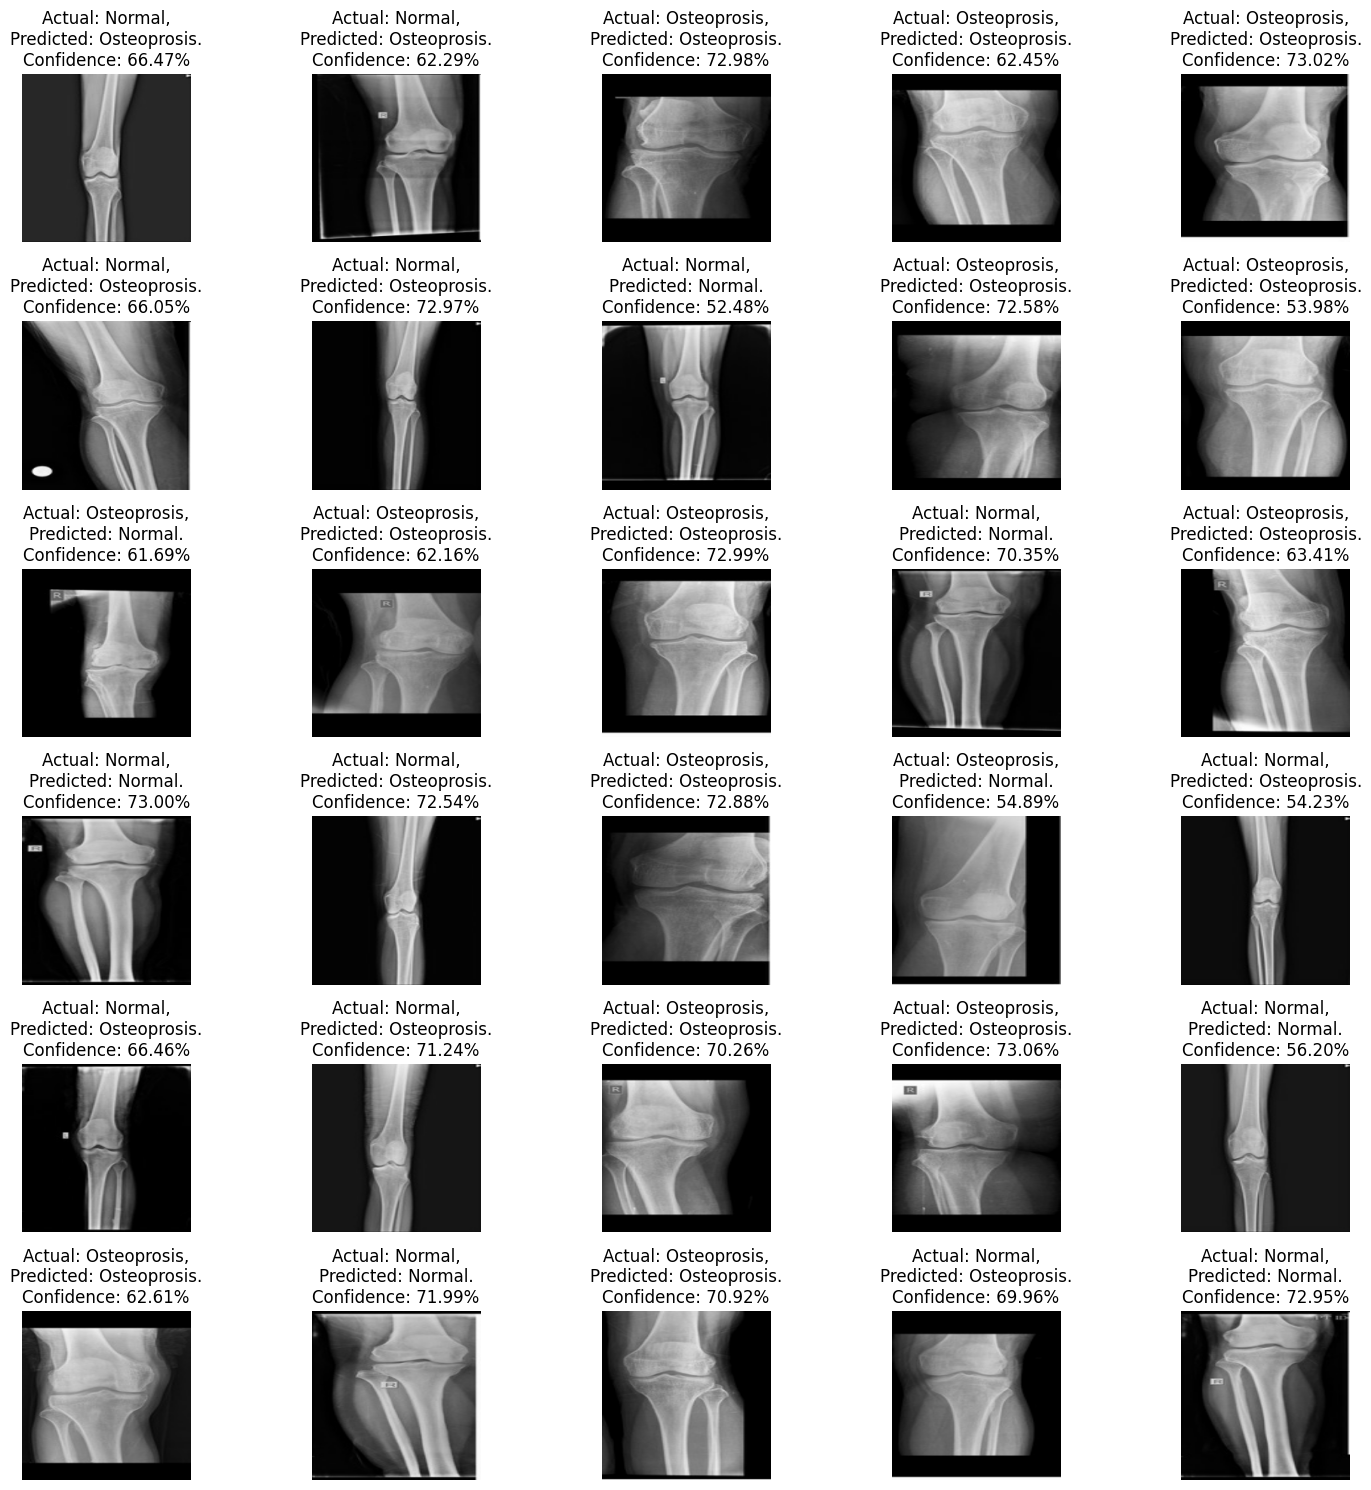

In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt

# Path to your test data directory (adjust as necessary)
test_data_dir = tf.keras.preprocessing.image_dataset_from_directory(
    '/content/drive/MyDrive/Knee training,validation and testing/testing',
    image_size=(224, 224),  # Adjust the size to match your model's input size
    batch_size=32,          # Adjust the batch size as needed
)

# Define your class names (adjust as necessary)
class_names = test_data_dir.class_names

# Define a function to predict the class and confidence
def predict(model, image, class_names):
    # Expand dimensions to match model input shape
    image = tf.expand_dims(image, axis=0)
    predictions = model.predict(image)
    predicted_class = class_names[tf.argmax(predictions[0]).numpy()]
    confidence = tf.reduce_max(tf.nn.softmax(predictions[0])) * 100
    return predicted_class, confidence.numpy()

# Set up the plot
plt.figure(figsize=(15, 15))  # Adjust the size for better visibility

# Iterate over a batch of test data
for images, labels in test_data_dir.take(1):
    num_images_to_display = min(30, images.shape[0])  # Ensure we don't exceed the number of available images
    for i in range(num_images_to_display):  # Loop through the number of images to display
        ax = plt.subplot(6, 5, i + 1)  # 6 rows and 5 columns for 30 images
        plt.imshow(images[i].numpy().astype("uint8"))

        predicted_class, confidence = predict(model, images[i].numpy(), class_names)
        actual_class = class_names[labels[i]]

        plt.title(f"Actual: {actual_class},\nPredicted: {predicted_class}.\nConfidence: {confidence:.2f}%")
        plt.axis("off")

plt.tight_layout()  # Adjust the layout to prevent overlap
plt.show()



In [ ]:
from sklearn.metrics import recall_score

# Assuming you have the true labels and predicted labels
y_true = [0, 1, 1, 0, 1, 1, 0, 1]  # Replace with your actual true labels
y_pred = [0, 1, 0, 0, 1, 1, 1, 1]  # Replace with your model's predicted labels

# Calculate sensitivity (recall)
sensitivity = recall_score(y_true, y_pred)
print("Sensitivity:", sensitivity)


Sensitivity: 0.8


In [ ]:
from sklearn.metrics import accuracy_score

# Assuming you have the true labels and predicted labels
y_true = [0, 1, 1, 0, 1, 1, 0, 1]  # Replace with your actual true labels
y_pred = [0, 1, 0, 0, 1, 1, 1, 1]  # Replace with your model's predicted labels

# Calculate accuracy
accuracy = accuracy_score(y_true, y_pred)

# Calculate error rate
error_rate = 1 - accuracy
print("Error Rate:", error_rate)
